# Project Business Statistics: E-news Express

**Marks: 60**

# **Problem Statement and Objectives**

**Problem Statement**

The advent of e-news, or electronic news, portals has offered us a great opportunity to quickly get updates on the day-to-day events occurring globally. The information on these portals is retrieved electronically from online databases, processed using a variety of software, and then transmitted to the users. There are multiple advantages of transmitting new electronically, like faster access to the content and the ability to utilize different technologies such as audio, graphics, video, and other interactive elements that are either not being used or aren’t common yet in traditional newspapers.
E-news Express, an online news portal, aims to expand its business by acquiring new subscribers. With every visitor to the website taking certain actions based on their interest, the company plans to analyze these actions to understand user interests and determine how to drive better engagement. The executives at E-news Express are of the opinion that there has been a decline in new monthly subscribers compared to the past year because the current webpage is not designed well enough in terms of the outline & recommended content to keep customers engaged long enough to make a decision to subscribe.
[Companies often analyze user responses to two variants of a product to decide which of the two variants is more effective. This experimental technique, known as A/B testing, is used to determine whether a new feature attracts users based on a chosen metric.]


**Objective**

The design team of the company has researched and created a new landing page that has a new outline & more relevant content shown compared to the old page. In order to test the effectiveness of the new landing page in gathering new subscribers, the Data Science team conducted an experiment by randomly selecting 100 users and dividing them equally into two groups. The existing landing page was served to the first group (control group) and the new landing page to the second group (treatment group). Data regarding the interaction of users in both groups with the two versions of the landing page was collected. Being a data scientist in E-news Express, you have been asked to explore the data and perform a statistical analysis (at a significance level of 5%) to determine the effectiveness of the new landing page in gathering new subscribers for the news portal by answering the following questions:
1.	Do the users spend more time on the new landing page than on the existing landing page?
2.	Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?
3.	Does the converted status depend on the preferred language?
4.	Is the time spent on the new page the same for the different language users?



**Data**

The dataset provided (abtest.csv) contains the randomly selected users and the data related to the groups interaction to the landing pages. The detailed data dictionary is given below.

**Data Dictionary**

The data contains information regarding the interaction of users in both groups with the two versions of the landing page.

1. user_id - Unique user ID of the person visiting the website
2. group - Whether the user belongs to the first group (control) or the second group (treatment)
3. landing_page - Whether the landing page is new or old
4. time_spent_on_the_page - Time (in minutes) spent by the user on the landing page
5. converted - Whether the user gets converted to a subscriber of the news portal or not
6. language_preferred - Language chosen by the user to view the landing page


## Import all the necessary libraries

In [2]:
# import libraries for data manipulation
import numpy as np
import pandas as pd
from decimal import Decimal

# import libraries for data visualization
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

# Library to help with statistical analysis
import scipy.stats as stats       
from scipy.stats import binom     
from scipy.stats import norm
from scipy.stats import t
from scipy.stats import ttest_ind
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway
from scipy.stats import levene

# command to tell Python to display graphs
%matplotlib inline

# command to tell Python to ignore warnings
warnings.filterwarnings("ignore")

# to restrict the float value to 2 decimal places
pd.set_option('display.float_format', lambda x: '%.2f' % x)

## Reading Data into a DataFrame

In [3]:
# allow Colab to access my Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# read the dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BStats/Project/abtest.csv')

In [5]:
# copying data to another variable to avoid any changes to original data
df = data.copy()

## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the data type and statistical summary for the variables
- Check for missing values
- Check for duplicates

## **DATA OVERVIEW**

In [6]:
# check data import is correct. Returns the first 5 rows of the data table
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [7]:
# check data import is correct. Returns the last 5 rows of the data table
df.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


In [8]:
# Displaying the number of rows and columns of the dataset using shape attribute
print("Total of :", df.shape[0], 'rows and', df.shape[1], "columns.")

Total of : 100 rows and 6 columns.


In [9]:
# To print a concise summary of the DataFrame datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


In [10]:
# Check to see if there are any missing data in each column. 
df.isnull().any()

user_id                   False
group                     False
landing_page              False
time_spent_on_the_page    False
converted                 False
language_preferred        False
dtype: bool

In [11]:
# Display the statistical summary of the dataset for all the columns including categorical
# T is used to transpose the matrix for readability

df.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
user_id,100.00,NaN,NaN,NaN,546517.00,52.30,546443.00,546467.75,546492.50,546567.25,546592.00
group,100,2,control,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
landing_page,100,2,old,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
time_spent_on_the_page,100.00,NaN,NaN,NaN,5.38,2.38,0.19,3.88,5.42,7.02,10.71
converted,100,2,yes,54,NaN,NaN,NaN,NaN,NaN,NaN,NaN
language_preferred,100,3,Spanish,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN


***Statistical Summary Observation***

1. There is a total of 100 users (user_id) in the data sets
2. The mean time spent on the page is about 5.38 mins and the median is 5.42 which could suggest a bell-shaped distribution 
3. Standard deviation is about 2.38 mins
4. The minimum time spent on a page is 0.19 min and the max time spent is approx 11 mins


In [12]:
# Returns the number of unique values for each column.
df.nunique()

user_id                   100
group                       2
landing_page                2
time_spent_on_the_page     94
converted                   2
language_preferred          3
dtype: int64

In [13]:
# verify if there is any duplicates in the dataframe and print them

duplicateRows = df[df.duplicated()]
print(duplicateRows)         #view duplicate rows if any

Empty DataFrame
Columns: [user_id, group, landing_page, time_spent_on_the_page, converted, language_preferred]
Index: []


### ***Data Overview Observation***
1. Data has been imported correctly. Table shows first 5 rows and last 5 rows (index 0-99)
2. Total of 100 rows and 6 columns in the dataset
3. The dataset consist of datatype : integer, continuous quantitative variable (represented by float) and objects (string text)
4. There is no missing or incomplete data in the dataset columns
5. And there are no duplicated rows of data in the columns
6. The median score of time spent of page (5.38) is almost close to the average (5.42), which suggests that the time might be normally distributed.







# **Visualization**

### Univariate Analysis

***Groups***

In [14]:
df['group'].value_counts()

control      50
treatment    50
Name: group, dtype: int64

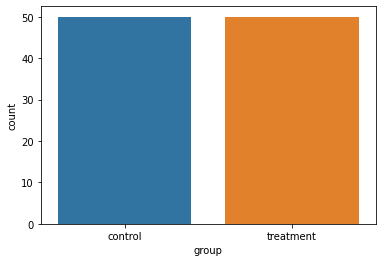

In [15]:
# Group is an Object Dtype. Using countplot to show the counts of observations in each categorical bin using bars
sns.countplot(data=df,x='group')
plt.show()

***Landing Page***

In [16]:
df['landing_page'].value_counts()

old    50
new    50
Name: landing_page, dtype: int64

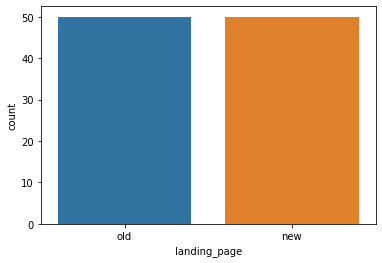

In [17]:
# Using countplot to show the counts of observations for the landing page
sns.countplot(data=df,x='landing_page')
plt.show()

Observation on Groups and Landing Page :
1. As per business objective, it can be verified that the groups have been divided equally into two groups : control and treatment, each having a count of 50.
2. The landing page are equally divided between two groups as well havign the values : Old and New, each equally with 50 counts

***Time Spent On Page***

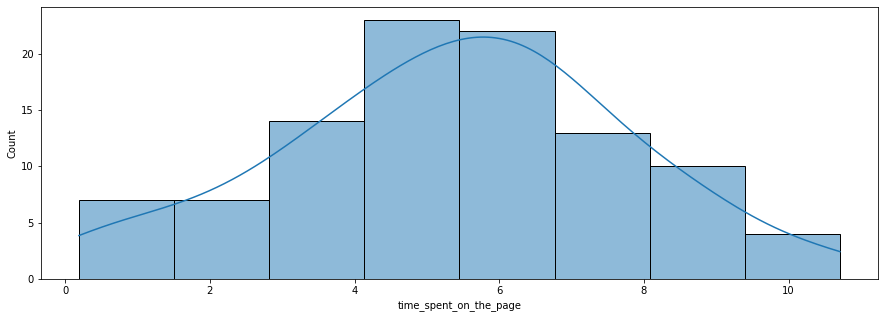

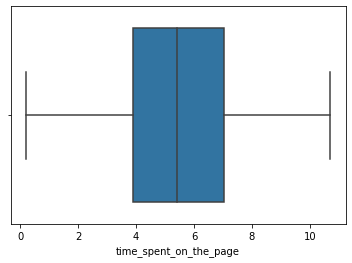

In [18]:
# analysis on time spent on page using histplot and boxplot

plt.figure(figsize=(15,5))
sns.histplot(data = df, x ="time_spent_on_the_page", kde = True);
plt.show()

sns.boxplot(data = df, x ="time_spent_on_the_page");
plt.show()

Observation :
1. Estimate majority of the time spent on page falls slightly below 4 mins and about 7 minutes, with the average time spent (Q2) at approx 5 minutes
2. The longest time spent on a page is close to 11 minutes and the shortest times taken is approximately close to 0.5 minutes
3. We can say that the distribution is close to symmetrical as the median is at the center of the interquartile range
4. Even though the mean and the median are almost equal, the boxplot shows that the distribution is positively skewed, because the whisker and half-box are longer on the right side of the median than on the left side
5. There are no outliers in the time dataset


***Conversion Rate***

yes    54
no     46
Name: converted, dtype: int64


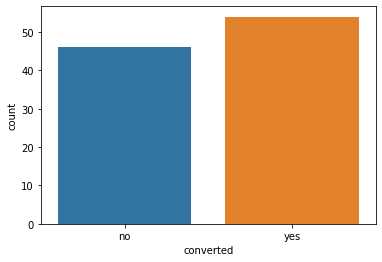

In [19]:
# Using countplot to show the counts of observations for the converted status.

convert_rate = df['converted'].value_counts()
print(convert_rate)         #output

sns.countplot(data=df, x='converted')
plt.show()

Observation :
1. The number of Yes converted status (54) is more than the No status (46)

***Prefered Language***

Spanish    34
French     34
English    32
Name: language_preferred, dtype: int64


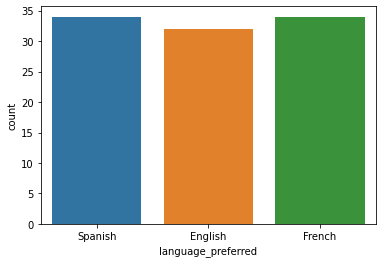

In [20]:
# Using countplot to show the counts of the Language chosen by the user to view the landing page

language = df['language_preferred'].value_counts()
print(language)         #output

sns.countplot(data=df, x='language_preferred')
plt.show()

Observation :
1. Spanish and French language have equal preference. English language has a marginally lower choice.

### Bivariate Analysis

***Analyis on Time Spent Against Other Variables***

### Time Spent vs Group

The mean time spent by group type is: 
        group  time_spent_on_the_page
0    control                    4.53
1  treatment                    6.22


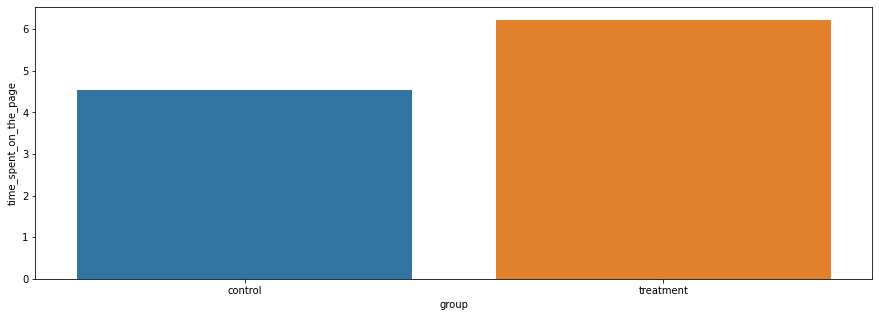

In [21]:
# Plot and show the average of time spent by the Group type

#Groups the data by "group" and calculate the mean of the "time spent" column for each group
#assign the result to the variable "df_mean_by_group"
#use the reset index of the resulting dataframe, so that "Group Type" becomes a column instead of the index

df_mean_bygroup = df.groupby('group')['time_spent_on_the_page'].mean().reset_index()
print('The mean time spent by group type is:','\n',df_mean_bygroup)

# using a barplot to show the categorical display
plt.figure(figsize=(15,5))
sns.barplot(data = df_mean_bygroup, x='group',y='time_spent_on_the_page')
plt.show()



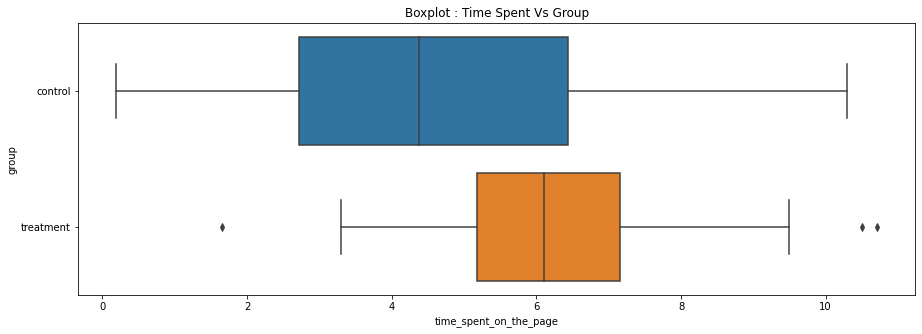

In [22]:
# show the group type categorized and time spent using a boxplot
plt.figure(figsize=(15,5))
plt.title('Boxplot : Time Spent Vs Group')
sns.boxplot(data = df, x ="time_spent_on_the_page", y="group");

Observation :

1. It is more likely for the treatment group usrs to spend more time (more time exposed on the new landing page).

### Time Spent vs Landing Page

In [23]:
df.groupby(['landing_page'])['time_spent_on_the_page'].mean()

landing_page
new   6.22
old   4.53
Name: time_spent_on_the_page, dtype: float64

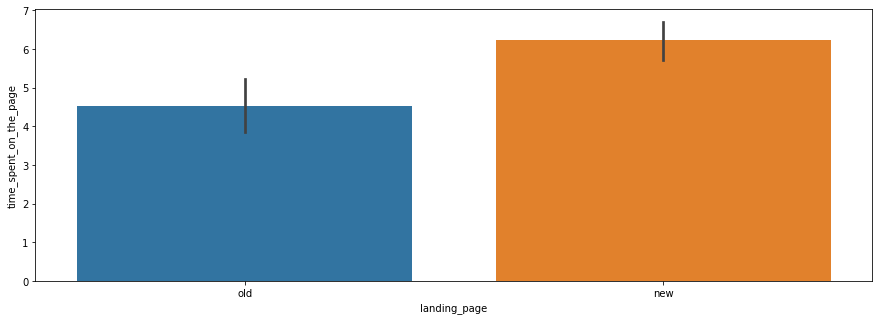

In [24]:
# Plot and show the time spent by the landing page
plt.figure(figsize=(15,5))
sns.barplot(data = df, x = 'landing_page', y = 'time_spent_on_the_page')
plt.show()

Observation :

1. The observation holds true that there are more users exposed/spending more time on average on the New Landing Page


### Time Spent vs Conversion Status

In [25]:
# assign variables for calculation
old_page = df[df["landing_page"] == "old" ]
new_page = df[df["landing_page"] == "new" ]

# fidn the percentage of conversion of users
print(" Percentage converted status - old landing page = ", str((old_page[df["converted"]=="yes"].count()["converted"]/50)*100)+"%" )
print(" Percentage converted status - new landing page = ", str((new_page[df["converted"]=="yes"].count()["converted"]/50)*100)+"%" )

 Percentage converted status - old landing page =  42.0%
 Percentage converted status - new landing page =  66.0%


The mean time of users who visited a page and got converted is: 
   converted  time_spent_on_the_page
0        no                    3.92
1       yes                    6.62


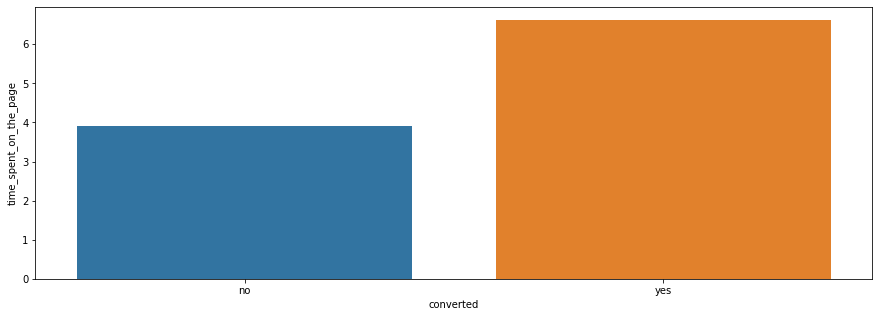

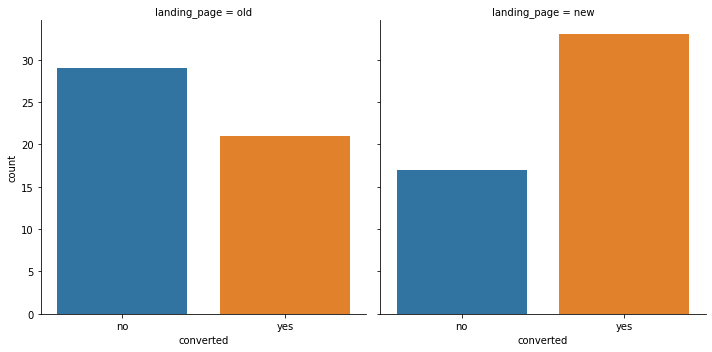

landing_page  converted
new           yes          33
              no           17
old           no           29
              yes          21
Name: converted, dtype: int64


In [26]:
#find the avreage time of users who converted among both groups, old landing page and new landing page
df_total_byConversion = df.groupby('converted')['time_spent_on_the_page'].mean().reset_index()
print('The mean time of users who visited a page and got converted is:','\n',df_total_byConversion)

# using a barplot and catplot to show the categorical display for converted status
plt.figure(figsize=(15,5))
sns.barplot(data = df_total_byConversion, x='converted', y = 'time_spent_on_the_page')
sns.catplot(data = df, x='converted', col = 'landing_page', kind = 'count');
plt.show()

#find the number of users who converted among both groups, old landing page and new landing page
convert_count = df.groupby(['landing_page'])['converted'].value_counts()
print(convert_count)

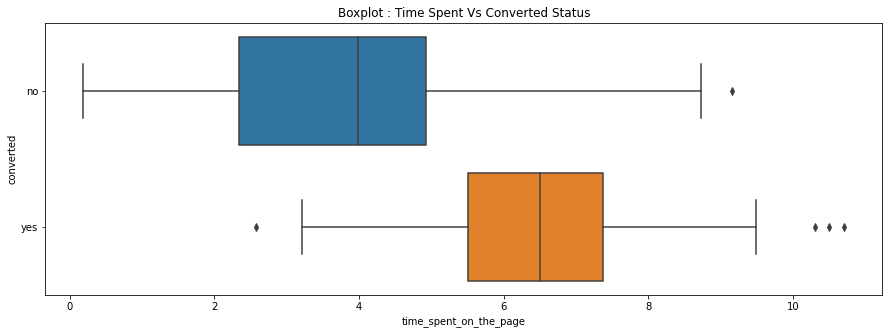

In [27]:
# show the converted status and time spent using a boxplot
plt.figure(figsize=(15,5))
plt.title('Boxplot : Time Spent Vs Converted Status')
sns.boxplot(data = df, x ="time_spent_on_the_page", y="converted");

Observation :

1. The observation holds true that the proportion of users who visited the new landing page and got converted on average had a longer time spent.
2. The percentage (%) conversion rate is definitely higher for the new landing page (66%) as compared to the old landing page (42%).
3. More users are engaged on the new landing page and more likely to have converted than the old landing page

### Time Spent vs Preferred Language

In [28]:
# To calculte the Mean Time and Total Time spent on a page of the different languages

# df.groupby('language_preferred')['time_spent_on_the_page'].sum()
print('The total time spent by language choice is:','\n',df.groupby('language_preferred')['time_spent_on_the_page'].sum().reset_index())

The total time spent by language choice is: 
   language_preferred  time_spent_on_the_page
0            English                  177.89
1             French                  178.61
2            Spanish                  181.28


In [53]:
df_total_byLanguage = df.groupby('language_preferred')['time_spent_on_the_page'].mean().reset_index()
print('The mean time spent by language choice is:','\n',df_total_byLanguage)


The mean time spent by language choice is: 
   language_preferred  time_spent_on_the_page
0            English                    5.56
1             French                    5.25
2            Spanish                    5.33


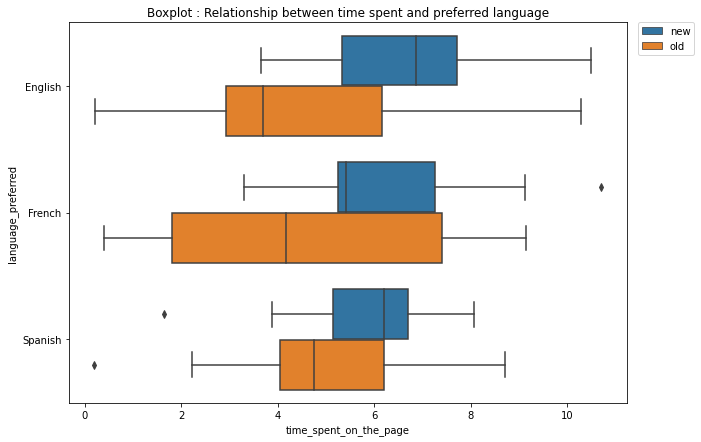

In [30]:
plt.figure(figsize=(10,7))
plt.title('Boxplot : Relationship between time spent and preferred language')
sns.boxplot(y="language_preferred", x="time_spent_on_the_page",data=df.sort_values("language_preferred", ascending = True), hue="landing_page")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);

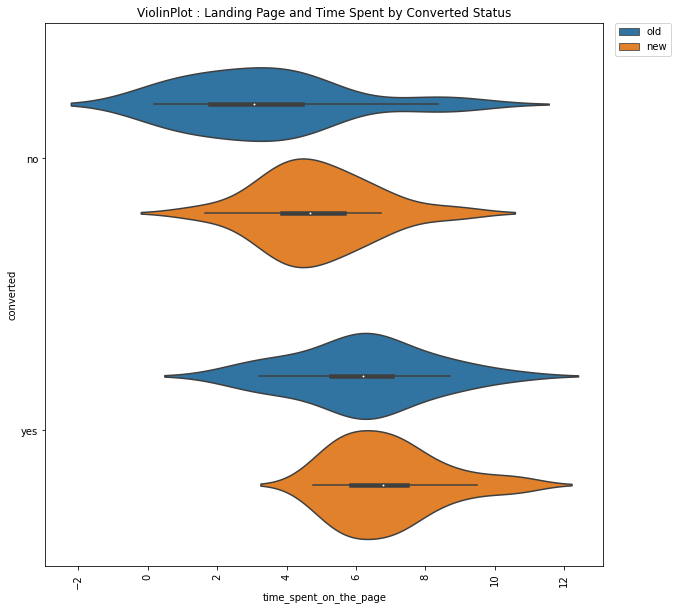

In [31]:
# multi variate analysis on the landing page, conversion and time spent
plt.figure(figsize=(10,10))
plt.title('ViolinPlot : Landing Page and Time Spent by Converted Status')
plt.xticks(rotation = 90)
sns.violinplot(data = df, y ="converted", x="time_spent_on_the_page", hue="landing_page", split = False);
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);

Observation :

1. It is important to observe and consider both the total time spent and the mean time spent when analyzing the relationship between Language and Time Spent, as they give different insights into the user behavior. 
2. The observation holds true that the most user preferred language and total time spent on a page is in Spanish (181.28 mins)
3. However, on average, users spend more time on the page when it is displayed in English (5.56 minutes) compared to French (5.25 minutes) and Spanish (5.33 minutes). It could be a possiblity that a small number of users spend a significantly longer time on the page displayed in English, bringing up the overall mean time spent.
4. The median time spent on the new landing page is significantly more than the old landing page for all the users regardless of their preferred language.
5. The total time spent provides a general overview of the level of user engagement, while the mean time provides a more brief understanding on how the users are engaged with a page.
6. We would need to carry out further statistical testing to verify if the variance is in between language groups or within language groups.

### Relationship between Preferred Language, Conversion Rate and Landing Page

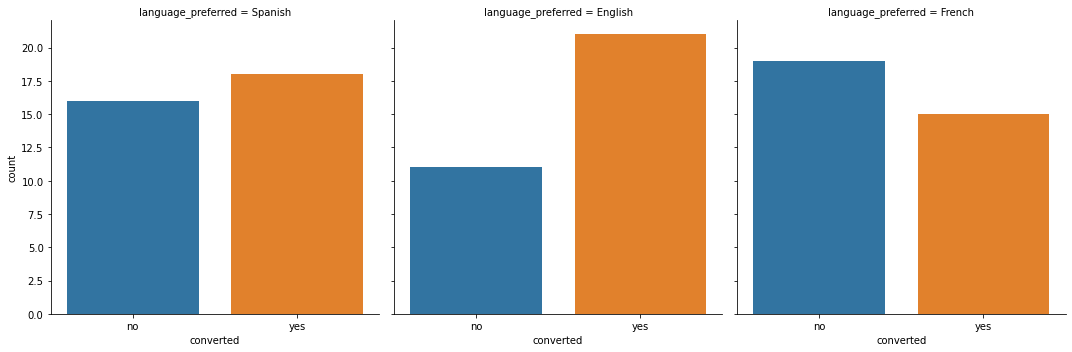

In [32]:
# using catplot to carry out a visual analysis on the relationship between preferrred language and conversion rate

sns.catplot(data = df, x = 'converted', col = 'language_preferred', kind = 'count')
plt.show()

In [33]:
# assign variables for computations
old_page = df[df["landing_page"] == "old" ]
new_page = df[df["landing_page"] == "new" ]

old_converted = old_page[df['converted'] == 'yes']
new_converted = new_page[df['converted'] == 'yes']

# compute the number of users converted from the old landing page by the type of preferred Language
df_converted_old = old_converted.groupby('language_preferred')['user_id'].count()

# compute the number of users converted from the new landing page by the type of preferred Language
df_converted_new = new_converted.groupby('language_preferred')['user_id'].count()

print("Percentage conversion - new landing page vs old landing page:")
print(100*((df_converted_new) -(df_converted_old))/df_converted_new)

Percentage conversion - new landing page vs old landing page:
language_preferred
English   -10.00
French     75.00
Spanish    36.36
Name: user_id, dtype: float64


Observation

1. From the Univariate Analysis, the count (number) of users in preferred language are Spanish 34, French 34 and English 32. There are equal number of Spanish and French prefer users.
2. % conversion for new landing page vs old page in descendig order is : 75% French, 36.36% for Spanish. Conversion on the new landing page is strong among French users.
3. % variance in conversion is -10% for English.This means these users converted more when they were on the older landing page. 

## 1. Do the users spend more time on the new landing page than the existing landing page?

**NOTE ON CONDUCTING A HYPOTHESIS TESTING :**

- Step 1: State your null and alternate hypothesis.
- Step 2: Based on the nature of the data under the hypothesis, select the appropriate test.
- Step 3 : Decide the significance level prior to conducting the test.
- Step 4 : Collect the appropriate data for the test.
- Step 5 : Calculate the p-value by conducting the test. Decide whether to reject or fail to reject your null hypothesis.
- Step 6 : Present your findings.

**Statistical Analysis - using level of significance (alpha) as 5%**
A 5% value of alpha would mean that we are 95% confident that our test results are significant and not by chance

### Step 1: Define the null and alternate hypotheses

- Ho : Null Hypothesis - The mean time spent on the new landing page is the same as the time spent on the existing landing page (ie. means of the time spent on the two landing pages are equal) 
- Ha : Alternate Hypothesis - The mean time spent on the new landing page is higher than time spent on the existing landing page.

Let mu1 and mu2 be the mean time spent on the new landing page and the mean time spent on the old landing page.

Statistically, the above hypotheses can be written as:
- Ho : mu1 = mu2
- Ha : mu1 > mu2

Note : This is a directional hypothesis in one direction.


### Step 2: Select Appropriate test

One Tail two-sample meaan test would fit for testing the difference between the means of **two independent groups**, which is the time spent on the new and old landing pages in this case. And since the **population standard deviation of the time spent on the two landing pages is not known**, we shall use a T-test for this question. 

This test assumes that the two groups have equal variances and that the data is normally distributed.

*NOTES*

Ref 1 : https://www.jmp.com/en_my/statistics-knowledge-portal/t-test.html

Verify T-Test Assumptions :
1. The data are continuous. [Yes, time_spent is measured on a continuous scale]
2. The sample data have been randomly sampled from a population. [Yes, random samples from population of two different groups,]
3. There is homogeneity of variance (i.e., the variability of the data in each group is similar). [Yes]
4. The population distribution is approximately normal. [Yes. Using the histoplot probability density curves above]
5. A reasonably large sample size is used [Yes, 100 which is greater > 30]

### Step 3: Decide the significance level

As per stated in the problem statement, the significance level (alpha)
 = 0.05. (Confidence interval therefore is 1- alpha = 0.95%)

 This means that if the p-value obtained from the test is less than 0.05, it suggests that the difference in means is statistically significant and we reject the null hypothesis. On the other hand, if the p-value is greater than 0.05, it suggests that the difference in means is not statistically significant and we fail to reject the null hypothesis.


### Step 4: Collect and prepare data

In [34]:
# Calculate the mean and std deviation for new and old page
mu1 = new_page["time_spent_on_the_page"].mean()
mu2 = old_page["time_spent_on_the_page"].mean()

std1, std2 = new_page["time_spent_on_the_page"].std() , old_page["time_spent_on_the_page"].std()

print("Mean(mu1) and Mean (mu2) are =",str(round(mu1,2))," and", str(round(mu2,2)))
print("Standard Deviation (std1) and Standard Deviation (std2) are =",str(round(std1,2))," and", str(round(std2,2)))


Mean(mu1) and Mean (mu2) are = 6.22  and 4.53
Standard Deviation (std1) and Standard Deviation (std2) are = 1.82  and 2.58


### Step 5: Calculate the p-value

In [35]:
#Performing a paired t-test
#This test will return 2 sample independent t-test (stats.ttest_ind) and p-value
#as variance of the two groups are not assumed to be equal, equal _var parameter is set to false
#alternative parameter is set to 'greater', indicating the Ha mean of data_new is greater than the mean of data_old.

t_test, p_value = stats.ttest_ind(new_page["time_spent_on_the_page"], old_page["time_spent_on_the_page"], equal_var = False, alternative = 'greater')

# Print the results
print('The t-score is: ', t_test)
print('The p-value is:', p_value)

The t-score is:  3.7867702694199856
The p-value is: 0.0001392381225166549


### Step 6: Compare the p-value with $\alpha$

In [36]:
# Compare the p-value to the significance level, alpha (0.05)

if p_value < 0.05:
    print("Since p_value < 0.05, we Reject the null hypothesis") #Users spend significantly more time on the new landing page than on the existing landing page
else:
    print("Since p_value > 0.05, we Fail to reject the null hypothesis") #Users do not spend significantly more time on the new landing page than on the existing landing page

Since p_value < 0.05, we Reject the null hypothesis


Lets plot the distribution

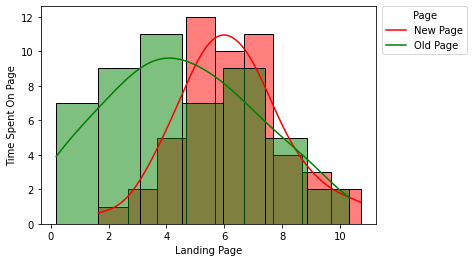

In [37]:
# plot the t-stats distribution along with the computed test statistics

sns.histplot(new_page["time_spent_on_the_page"], color = 'red', kde = True)
sns.histplot(old_page["time_spent_on_the_page"], color = 'green', kde = True)
plt.xlabel('Landing Page')
plt.ylabel('Time Spent On Page')
plt.legend( ('New Page', 'Old Page'), title = 'Page',bbox_to_anchor = (1.02,1), loc='upper left',borderaxespad=0)
plt.show()

We can observe from the KDE:

- Mean time spent on the new page is a normal distribution
- Mean time spent on the old page is more of a right skew distribution.
- Mean time for new page is higher (11mins) to the old page (9mins) which validates the below inference

### Step 7:  Draw inference

Since p_value < 0.05, we can Reject the null hypothesis. Hence we have eough statistical evidence to claim that users spend significantly more time on the new landing page than on the old landing page.

**A similar approach can be followed to answer the other questions.**

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

***Step 1: Define the null and alternate hypotheses***

- Ho : Null Hypothesis - The conversion rate (proportion of users) of the new page and old page is equal.
- Ha : Alternate Hypothesis - The conversion rate (proportion of users) for the new page is greater than the conversion rate for the old page

Let c1 and c2 be the conversion rate for the new landing page and the old landing page respectively.

Statistically, the above hypotheses can be written as:
 - Ho : c1 <= c2
 - Ha : c1 > c2

***Step 2: Select Appropriate test***

One Tail two-sample **Z-test Propotion** of two independent groups would fit for testing to compare the means of two populations when the population variances are known. 

Verify Z-Test Assumptions :

---
- Binomial Distributon. [Yes, conversion state is either Yes or No]
- The sample data have been randomly sampled from a population. [Yes, random samples from population of two different groups]
- Independent. [Yes, the two samples are independent of each other]
- Can the binomial distribution approximated to normal distribution. [Yes. The standard thing is to check whether np and n(1-p) are greater than or equal to 10. Here np1 = 33 and n(1-p1) = 17 and np2 = 21 and n(1-p2) = 29]

This test assumes that the two groups have equal variances and that the data is normally distributed.

Note : Refer to Hands_on_Notebook_Week3.ipynb for Z-Test Assumption

***Step 3 : Decide the significance level***

As per stated in the problem statement, the significance level (alpha) = 0.05. (Confidence interval therefore is 1- alpha = 0.95%) 

***Step 4: Collect and prepare data***

In [38]:
# assign variables for computations
old_page = df[df["landing_page"] == "old" ]
new_page = df[df["landing_page"] == "new" ]

old_converted = old_page[df['converted'] == 'yes']
new_converted = new_page[df['converted'] == 'yes']

# count the number of users converted from the old landing page
df_converted_old = old_converted.groupby('landing_page')['converted'].count()

# count the number of users converted from the new landing page
df_converted_new = new_converted.groupby('landing_page')['converted'].count()

print(df_converted_old)
print(df_converted_new)

landing_page
old    21
Name: converted, dtype: int64
landing_page
new    33
Name: converted, dtype: int64


***Step 5: Calculate the p-value***

In [39]:
# array of converted users (number of successes in each group) for both new and old page
converted_count = np.array([33, 21])        

# set the sample/observation size
nobs = np.array([50, 50])

# perform a z-test for two proportions. Print the test statistic and p-value
test_stat, p_value = proportions_ztest(converted_count, nobs,alternative = 'larger')
print('The p-value is',p_value)

print('Z-statistic is',test_stat)

The p-value is 0.008026308204056278
Z-statistic is 2.4077170617153842


***Step 6: Compare the p-value with  α***

In [40]:
# Compare the p-value to the significance level, alpha (0.05)

if p_value < 0.05:
    print("Since p_value < 0.05, we Reject the null hypothesis") #The conversion rate (proportion of users) of the new page and old page is less than or equal.
else:
    print("Since p_value > 0.05, we Fail to reject the null hypothesis") #The conversion rate (proportion of users) for the new page is greater than the conversion rate for the old page

Since p_value < 0.05, we Reject the null hypothesis


***Step 7: Draw inference***

 - Since the p-value (0.008) is much lesser than the level of significance (0.05), we can reject the null hypothesis.
 - At 5% significance level, we have enough statistical evidence to claim that the proportion of users who visit the landing page and get converted for the new page is greater than the conversion rate for the old page.

 

## 3. Is the conversion and preferred language are independent or related?

Hypothesis Steps :
 - Step 1 : Define Null and Alternate Hypothesis
 - Step 2 : Select Appropriate test
 - Step 3 : Determine the Variance Analysis
 - Step 4 : Prepare Data
 - Step 5 : Calculate the P-Value
 - Step 6 : Compare with P-Value & Alpha
 - Step 7 : Draw Conslusion

***Step 1 - Step 3***

- Ho : Null Hypothesis - The conversion rate (proportion of users) and preferred language are independent (not related to one another).
- Ha : Alternate Hypothesis - The conversion rate (proportion of users) is dependent on the preferred language

To determine whether conversion and preferred language (between two categorical variables) are independent or related, we would need to conduct a chi-squared test of independence statistical analysis.

***Note : Refer to az_tunes_case_study.ipynb***

---


To perform the chi-squared test, we would create a contingency table (crosstab) with the observed frequency counts for the two variables (i.e., conversion and preferred language). Then we calculate the expected frequency counts assuming independence and compare the observed and expected frequencies using the chi-squared function. If the chi-squared statistic is significant, then we reject the null hypothesis of independence and conclude that there is a significant association between the two variables.

***Level of significance is 0.05***


In [41]:
# Prepare the Data (Step 4)

# Create a contingency table using the pandas.crosstab() function
dependence = pd.crosstab(df.converted, df.language_preferred, margins = False, normalize = False)
dependence

language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


*Observation :*
- The above table gives an overview on the number of users and count that has been convered to subsribers based on the preferred language

In [42]:
# Calculate p_value (Step 5)
# This test will return 4 values : test statistic, p-values, degrees of freedom and the expected frequency

chi, p_value, dof, expected = chi2_contingency(dependence)
print('The p-value is :', round(p_value,3))
print('Test Statistics :',chi)
print('Degree of Freedom :',dof)    # df = (r - 1) * (c - 1), where r and c are the number of rows(1) and columns(2) in the contingency table, respectively

# measures the difference between observed and expected freq. The larger the difference, the more evidence there is against the null hypothesis of independence
print('Expected frequency : \n',expected)  

The p-value is : 0.213
Test Statistics : 3.0930306905370837
Degree of Freedom : 2
Expected frequency : 
 [[14.72 15.64 15.64]
 [17.28 18.36 18.36]]


***Step 6: Compare the p-value with α***

In [43]:
# Compare the p-value to the significance level, alpha (0.05)
if p_value < 0.05:
    print("Since p_value < 0.05, we Reject the null hypothesis") 
else:
    print("Since p_value > 0.05, we Fail to reject the null hypothesis") 

Since p_value > 0.05, we Fail to reject the null hypothesis


***Step 7: Draw a Conclusion***

As p-value (0.213) is greater than the level of significance (0.05), we fail the reject the null hypothesis. 

Therefore, we don't have enough statistical evidence to support the claim that the converted staus (proportion of users) is dependent of the language preferred. 

In other words, it means that the converted status is independent of the language preferred.

## 4. Is the time spent on the new page same for the different language users?

This is a Bivariate Analysis. 

***Step 1 - Step 3***

Let mu1, mu2 and mu3 be the mean time spent on the new landing page of the 3 different language users.

- Ho : Null Hypothesis - The mean time spent on the new landing page is the same for the different language users
- Ha : Alternate Hypothesis - At least one of the mean time spent (mu1, mu2 or m3) on the new landing page is different from the others.

Statistically, the above hypotheses can be written as:
- Ho : mu1 = mu2 = mu3 (mean time spent is equal)
- Ha : At least one of the mean time spent is different

We are comparing the sample means from 2 or more independent populations,whereby one sample variable is continous (time spent : numerical) and the other is catergorical (language : discrete). 

For such statistical test, we would select a One-Way ANOVA (analysis of variance). We would also need to ensure that the homogeneity of variance (Levene test) and normality (Shapiro-Wilk test) assumptions / test are met. 

If the p-value is below the chosen significance level (0.05), we would reject the null hypothesis and conclude that sufficient evidence of a difference in the mean time spent for the different language users. If the p-value is above the significance level, we would then fail to reject the null hypothesis and conclude that there is not enough evidence to suggest that the mean time spent is different for the different language users.

***Level of significance is 0.05***

***Step 4 - Step 5***

In [44]:
# Prepare the Data (Step 4) and Calculate the P-Value (Step 5)

# calculate the mean time spent on the 3 different languages
df_total_byLanguage = df.groupby('language_preferred')['time_spent_on_the_page'].mean().reset_index()
print('The mean time spent by language choice is:','\n',df_total_byLanguage)

The mean time spent by language choice is: 
   language_preferred  time_spent_on_the_page
0            English                    5.56
1             French                    5.25
2            Spanish                    5.33


In [45]:
# Now check the normality and equality of variance assumptions
# Using Shapiro-Wilk for normality check :

# Ho: Mean Time spent on the new landing page follows a normal distribution
# Ha: Mean Time spent on the new landing page does not follow a normal distribution


In [46]:
# calculate the p-value
w, p_value = stats.shapiro(df['time_spent_on_the_page'])
print('The p-value is:', round(p_value,3))

The p-value is: 0.564


In [47]:
# Compare the p-value to the significance level, alpha (0.05)
if p_value < 0.05:
    print("Since p_value < 0.05, we Reject the null hypothesis, which suggests that the data is not normally distributed") 
else:
    print("Since p_value > 0.05, we Fail to reject the null hypothesis, that the response follows the normal distribution") 

Since p_value > 0.05, we Fail to reject the null hypothesis, that the response follows the normal distribution


In [48]:
# Using Levene test for equality of variance :

# Ho: All population variances (mean time spent on new landing page for different languages) are equal.
# Ha: Atleast one variance is different from the rest.

# calculate the p-value
statistics, p_value = stats.levene(df['time_spent_on_the_page'][df['language_preferred']=='English'],
                                   df['time_spent_on_the_page'][df['language_preferred']== 'French'],
                                   df['time_spent_on_the_page'][df['language_preferred']=='Spanish'])    

print('The p-value is:', round(p_value,3))

The p-value is: 0.065


In [49]:
# Compare the p-value to the significance level, alpha (0.05)
if p_value < 0.05:
    print("Since p_value < 0.05, we Reject the null hypothesis,that mean time spent on the new landing page for different languages are equal") 
else:
    print("Since p_value > 0.05, we Fail to reject the null hypothesis,that mean time spent on the new landing page for different languages are equal") 

Since p_value > 0.05, we Fail to reject the null hypothesis,that mean time spent on the new landing page for different languages are equal


In [50]:
# Create separate variables to store the mean time spent with respect to the 3 different languages

time_spent_English  = df['time_spent_on_the_page'][df['language_preferred']=='English']
time_spent_French   = df['time_spent_on_the_page'][df['language_preferred']== 'French']
time_spent_Spanish  = df['time_spent_on_the_page'][df['language_preferred']=='Spanish']


In [51]:
# Step 5 : Calculate the p-Value (Perform the F-OneWay Anova test)
test_stat, p_value = f_oneway(time_spent_English,time_spent_French,time_spent_Spanish)
print('The p-value is:', round(p_value,3))

The p-value is: 0.867


***Step 6: Compare the p-value with α***

In [52]:
# Compare the p-value of the Anova test to the significance level, alpha (0.05)
if p_value < 0.05:
    print("Since p_value < 0.05, we Reject the null hypothesis") 
else:
    print("Since p_value > 0.05, we Fail to reject the null hypothesis") 

Since p_value > 0.05, we Fail to reject the null hypothesis


***Step 7: Draw a Conclusion***

As the p-value (0.87) is much greater than 0.05, we fail to reject the null hypothesis. Hence, we have enough statistical evidence to support the claim that the mean time spent on the new page for the different language users are all relatively equal.

## **Conclusions and Recommendations**

***Exploratory Data Analytics (EDA)***

From the graphical analysis carried out, we observe that :
- The average value of time spent by users across both the old and new landing pages is about 5.38 mins.
- However from the bivariate analysis, the mean time spent on the new landing page is 6.22 minutes, which is higher than the overall mean time of 5.38 minutes, indicating that users are spending more time on the new landing page than the old landing page.
- The minimum time spent on the landing page is 0.19 min and max time spent approximates 11 mins indicating a wide range and possibily an observation in user behavior/experience with the landing page.
- There are more users getting converted as a subscriber of the news portal. The percentage (%) conversion rate is definitely higher for the new landing page (66%) as compared to the old landing page ( 42%). 
- It is important to observe and consider both the total time spent and the mean time spent when analyzing the relationship between Language and Time Spent, as they give different insights into user behavior. Conversion when on the new landing page is very strong among users prefering French language and marginally poor for users prefering English.
- On average, users spend more time on the page when it is displayed in English (5.56 minutes) compared to Spanish (5.33 minutes) and French (5.25 minutes).

**CONCLUSION OF EDA**
1. The time spent on the new landing page is significantly more than the old landing page for all the users regardless of their preferred language.
2. The total time spent provides a general overview of the level of user engagement, while the mean time provides a more brief understanding on how the users are engaged with a page.
3. We would need to carry out further statistical testing to verify if the variance is in between language groups or within language groups.
4. Conversion on the new landing page is strong among French users.
5. The conversion rate for the new page is greater than the conversion rate for the old page.



***Statistical Analysis***

From the Statistical Analysis conducted, we found:

- Enough evidence using the two independent sample T-test, to suggest that the mean time spent on the new landing page is higher than the time spent on the existing landing page. *(the null hypothesis is rejected in favor of the alternative hypothesis)*
- Enough evidence using a one-tailed two-sample Z-test, to accept the alternative hypothesis that the conversion rate for the new landing page is greater than the conversion rate for the old landing page. The Z-statistic of 2.41, indicates that the difference between the two conversion rates is statistically significant. *(the null hypothesis is rejected in favor of the alternative hypothesis)*
- No significant evidence using the chi-square test of independence to suggest that the conversion rate is dependent on the preferred language. We do not have enough evidence to conclude that there is a relationship between the two variables. *(the null hypothesis is not rejected)*
- No significant evidence using the one-way ANOVA test, to suggest that at least one of the mean time spent on the new landing page for the different language users is different from the others. *(the null hypothesis is not rejected)*
 
**CONCLUSION OF STATISTICAL ANALYSIS**

1. The new landing page is performing better than the existing landing page in terms of keeping the user engaged for a longer period of time.
2. It is more likely that users who visited the new landing page will convert compared to those who visit the old landing page. This could be due to various reasons, such as a better design, more engaging content, or a more intuitive layout.
3. It is more probable that the conversion rate is not influenced by the preferred language of the users. The language preference may have bearing on other measures such as user engagement, satisfaction, or retention, but it does not seem to influence the likelihood of conversion.
4. In other words, the mean time spent on the new landing page for the different language users is statistically the same


## ***RECOMMENDATIONS***

1. Since the mean time spent on the new landing page is higher than the time spent on the existing landing page and the conversion rate of the new page is greater than the conversion rate of the old page, it is recommended for the business to adopt the new landing page moving forward.
2. Since there is insufficent evidence to conclude that the conversion rate is dependent on the preferred language, it is recommended to further investigate and analyze the data to identify any potential patterns or trends.
3. Since there is not enough evidence to conclude that there are any significant differences in the mean time spent by different language users, it is recommended to continue to monitor and analyze user behavior to identify any potential areas for improvement.